### Задание: предсказание на 2020 год
##### линейная регрессия
Возьмите данные по безработице в городе Москва: 

https://video.ittensive.com/python-advanced/data-9753-2019-07-25.utf.csv

Сгруппируйте данные по годам, и, если в году **меньше 6 значений**, отбросьте эти годы.

Постройте модель линейной регрессии по годам среднего значения отношения UnemployedDisabled к UnemployedTotal (процента людей с ограниченными возможностями) за месяц и ответьте, какое ожидается значение процента безработных инвалидов в 2020 году при сохранении текущей политики города Москвы?

Ответ округлите до сотых. Например, 2,32

In [6]:
import pandas as pd
import numpy as np

unemp = pd.read_csv('https://video.ittensive.com/python-advanced/data-9753-2019-07-25.utf.csv', sep=';')
unemp = unemp.iloc[:,:-1]      # убрать пустую колонку

# вычислить процент людей с ограниченными возможностями в отдельную колонку
unemp['prc'] = unemp.apply(lambda row: row.UnemployedDisabled/row.UnemployedTotal*100, axis=1)

print(unemp.shape)

# отбор только тех лет, где не менее 6 записей
une_less_6 = unemp.groupby('Year').filter(lambda x: x['ID'].count() > 5)

# une_less_6.head()

# группировка по годам среднего процента людей с ограниченными возможностями
une = une_less_6.groupby('Year',as_index=True)['prc'].mean()
une = une.reset_index()

(101, 10)


In [15]:
##  Линейная регрессия

# Подготовка переменных

x = une['Year']
y= une['prc']

x = x.array.reshape(-1,1)
y = y.array.reshape(-1,1)

import sklearn
# from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

# Стандартизуем значения переменных 
sc = StandardScaler()
X_ = sc.fit_transform(x)

# print(X_)   # для контроля

from sklearn.linear_model import LinearRegression

# создадим экземпляр класса LinearRegression
clf = LinearRegression()
# fit - метод для обучения, обучаемся на всех данных
clf.fit(x,y)

# Добавляем прогрнозный год 
x = np.append(x,[2020]).reshape(-1,1)
# print(x)

# Вычисляем прогнозные значения
y_pred = clf.predict(x)
print(f"Прогнозируемый процент безработных инвалидов в 2020 = {np.round(y_pred[-1],2)[0]}")

Прогнозируемый процент безработных инвалидов в 2020 = 1.52


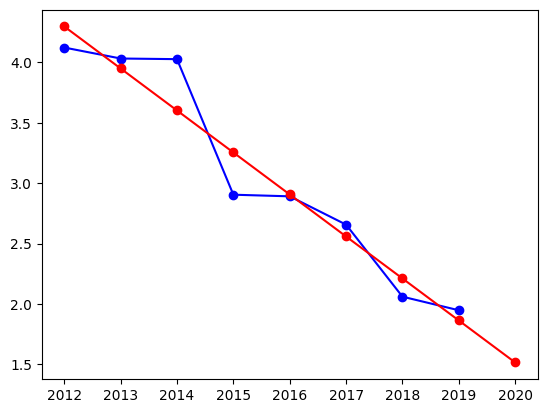

In [16]:
import matplotlib.pyplot as plt

plt.plot(x[:-1],y,'bo-')
plt.plot(x,y_pred,'ro-')
plt.show()